In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
for dirname, _, filenames in os.walk('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train'):
    print(dirname)

../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA3
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Malex.gen!J
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/C2LOP.gen!g
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Wintrim.BX
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Instantaccess
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Obfuscator.AD
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Allaple.L
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/VB.AT
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA2
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Lolyda.AA1
../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_da

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

import glob
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import tensorflow.keras as keras

In [4]:
from keras.preprocessing.image import ImageDataGenerator
path_root = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train'

id_gen = ImageDataGenerator(rescale=1./255., 
                            validation_split=0.1,
#                             shear_range=0.2,
#                             zoom_range=0.2,
#                             horizontal_flip=True
                           )

train_generator = id_gen.flow_from_directory(directory=path_root,
                                           target_size=(128,128),
                                           class_mode="categorical",
                                           subset='training',
                                           color_mode="grayscale")

validation_generator = id_gen.flow_from_directory(directory=path_root, 
                                                  target_size=(128,128),
                                                  class_mode="categorical",                                                 
                                                  subset='validation',
                                                  color_mode="grayscale")

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128,128,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(25, activation='softmax'))

model.summary()

model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(train_generator, 
                    validation_data = validation_generator, 
#                     steps_per_epoch = 100, 
                    epochs = 10)


Found 7574 images belonging to 25 classes.
Found 830 images belonging to 25 classes.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_____________________________________

In [5]:
# path_root = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train'
# batches = ImageDataGenerator().flow_from_directory(directory=path_root, 
#                                                    target_size=(128,128), 
# #                                                    batch_size=8500,
#                                                    color_mode="rgb")

In [6]:
# from keras.preprocessing.image import ImageDataGenerator
# path_root = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train'

# id_gen = ImageDataGenerator(rescale=1./255., 
#                             validation_split=0.1,
# #                             shear_range=0.2,
# #                             zoom_range=0.2,
# #                             horizontal_flip=True
#                            )

# train_generator = id_gen.flow_from_directory(directory=path_root,
#                                            target_size=(256,256),
#                                            class_mode="categorical",
#                                            subset='training',
#                                            color_mode="rgb")

# validation_generator = id_gen.flow_from_directory(directory=path_root, 
#                                                   target_size=(256,256),
#                                                   class_mode="categorical",                                                 
#                                                   subset='validation',
#                                                   color_mode="rgb")

In [ ]:
# from tqdm import tqdm
# imgs, labels = tqdm(next(batches))

In [ ]:
# imgs.shape

In [30]:
# import tensorflow as tf
# import matplotlib as mpl
# import matplotlib.pyplot as plt

# mpl.rcParams['figure.figsize'] = (8, 8)
# mpl.rcParams['axes.grid'] = False

# pretrained_model = tf.keras.applications.InceptionResNetV2(input_shape=(128, 128, 3),
#                                                      weights='imagenet',
#                                                     include_top=False,
#                                                     pooling='avg')
# pretrained_model.trainable = False

# x = layers.Flatten()(pretrained_model.output)

# # Add a fully connected layer with 512 hidden units and ReLU activation
# # x = layers.Dense(512, activation='relu')(x)

# # Add a dropout rate of 0.5
# # x = layers.Dropout(0.5)(x)

# # Add a final sigmoid layer for classification
# x = layers.Dense(25, activation='sigmoid')(x)

# model = tf.keras.models.Model(pretrained_model.input, x)

# model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['acc'])
# # ImageNet labels
# vgghist = model.fit(train_generator, 
#                     validation_data = validation_generator, 
#                     steps_per_epoch = 100, 
#                     epochs = 10)

# # decode_predictions = model.decode_predictions



In [7]:
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (128, 128))
    image = tf.keras.applications.inception_resnet_v2.preprocess_input(image)
    image = image[None, ...]
    return image

# Helper function to extract labels from probability vector
def get_imagenet_label(probs):
    label = np.argmax(probs[0])
    return label, probs[0][label]


In [19]:
# image_path = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/train/Adialer.C/000bde2e9a94ba41c0c111ffd80647c2.png'
# image_raw = tf.io.read_file(image_path)
# image = tf.image.decode_image(imgs[0])
imgs = cv2.cvtColor(cv2.imread('../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/validation/Allaple.A/00000d3e89aa9d228251616ae7a6ab06.png'), cv2.COLOR_RGB2GRAY)
imgs = np.reshape(imgs, (imgs.shape[0],imgs.shape[1],1))
print(imgs.shape)
image = preprocess(imgs)
print(image.shape)
image_probs = model.predict(image)

(248, 256, 1)
(1, 128, 128, 1)


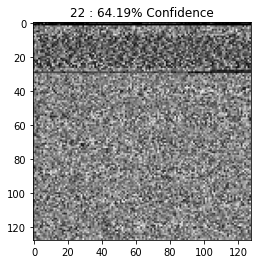

In [20]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5, cmap='gray')  # To change [-1, 1] to [0,1]
image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.show()

In [21]:
image_probs

array([[1.6548553e-16, 2.0698538e-01, 1.7971010e-18, 9.3647423e-16,
        3.4377067e-15, 7.0658858e-16, 9.5036128e-08, 7.3366541e-10,
        1.9626140e-03, 1.4918126e-01, 7.9660806e-10, 7.2318786e-23,
        1.3570541e-10, 2.4425317e-10, 1.1628883e-10, 4.8247972e-12,
        7.5642431e-15, 5.6977179e-10, 2.4790311e-19, 5.3194054e-13,
        2.2052529e-12, 2.8433555e-12, 6.4187068e-01, 5.0934461e-12,
        1.1086320e-19]], dtype=float32)

In [22]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        loss = loss_object(input_label, prediction)

    # Get the gradients of the loss w.r.t to the input image.
    gradient = tape.gradient(loss, input_image)
    # Get the sign of the gradients to create the perturbation
    signed_grad = tf.sign(gradient)
    return signed_grad

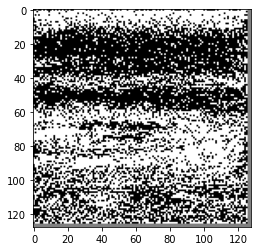

In [23]:
# Get the input label of the image.
labrador_retriever_index = image_class
label = tf.one_hot(labrador_retriever_index, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))

perturbations = create_adversarial_pattern(image, label)
plt.imshow(perturbations[0] * 0.5 + 0.5, cmap='gray');  # To change [-1, 1] to [0,1]

In [47]:
# perturbations[0] * 0.5 + 0.5

In [24]:
def display_images(image, description):
    label, confidence = get_imagenet_label(model.predict(image))
    plt.figure()
    plt.imshow(image[0]*0.5+0.5, cmap='gray')
    plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
                                                   label, confidence*100))
    plt.show()

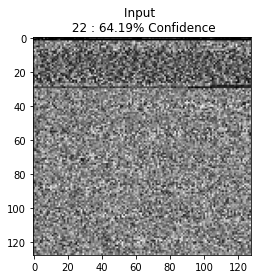

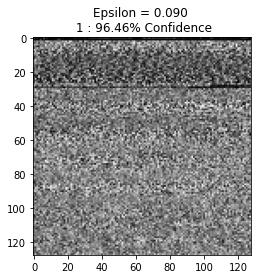

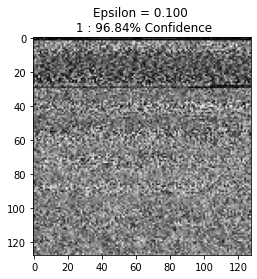

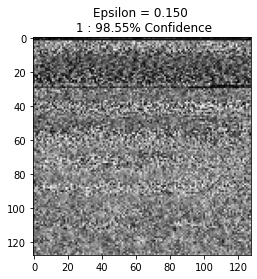

In [25]:
epsilons = [0, 0.01, 0.1, 0.15]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]

for i, eps in enumerate(epsilons):
    adv_x = image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    display_images(adv_x, descriptions[i])


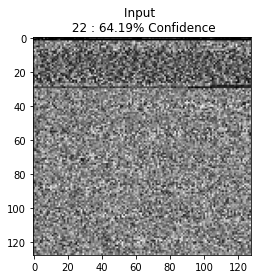

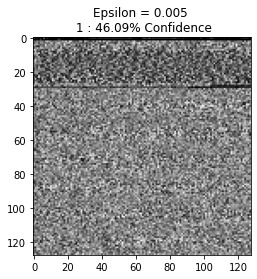

In [38]:
epsilons = [0, 0.005]
descriptions = [('Epsilon = {:0.3f}'.format(eps) if eps else 'Input')
                for eps in epsilons]
advs = []
for i, eps in enumerate(epsilons):
    adv_x = image + eps*perturbations
    adv_x = tf.clip_by_value(adv_x, -1, 1)
    advs.append(adv_x)
    display_images(adv_x, descriptions[i])

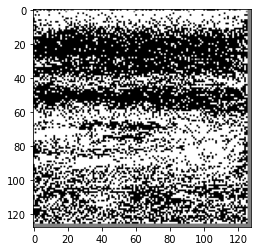

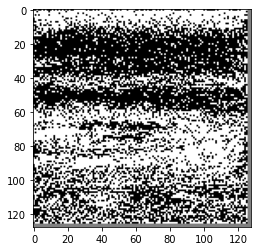

In [46]:
plt.imshow(np.reshape(np.subtract(advs[1], advs[0]), (128,128)), cmap='gray')
plt.show()

plt.imshow(perturbations[0] * 0.5 + 0.5, cmap='gray')
plt.show()

In [70]:
# np.array(image)[0][0]*0.5 + 0.5

(array([53., 15., 13., 20., 19.,  2.,  4.,  0.,  1.,  1.]),
 array([0.        , 0.05330882, 0.10661764, 0.15992646, 0.21323529,
        0.2665441 , 0.31985292, 0.37316173, 0.42647058, 0.4797794 ,
        0.5330882 ], dtype=float32),
 <BarContainer object of 10 artists>)

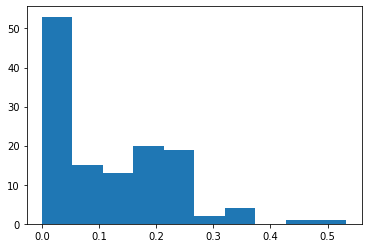

In [68]:
plt.hist(np.array(image)[0][0]*0.5 + 0.5)

In [69]:
cv2.calcHist([np.array(image)[0][0]*0.5 + 0.5],[0],None,[1],[0,1], accumulate=False) 

array([[128.]], dtype=float32)

In [ ]:
path = '../input/malimg-dataset9010/dataset_9010/dataset_9010/malimg_dataset/validation'